In [1]:
import pandas as pd

p = 'data/Country_Year_V-Dem_Full+others_CSV_v12/V-Dem-CY-Full+Others-v12.csv'
df = pd.read_csv(p)

/home/jonni/dev/demos/.venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (364,365,366,394,410,821,831,832,930,1235,1252,1481,3063,3282,3283,3338,3340,3344,3345,3347,3348,3349) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
import gc
gc.collect()

21

In [3]:
len(df)

27380

In [4]:
cols = df.columns
important_indexes = [
    'v2x_polyarchy', 
    'v2x_libdem', 
    'v2x_partipdem', 
    'v2x_delibdem', 
    'v2x_egaldem', 
    'v2x_liberal', 
    'v2x_partip', 
    'v2xdl_delib', 
    'v2x_egal',
    'v2cacamps' #polarization
]
primary_cols = [
    'country_name',
    'country_text_id',
    'country_id',
    'year',
    'historical_date',
    'project',
    'historical',
    'histname',
    'codingstart',
    'codingend'
]

core_set = primary_cols + important_indexes

In [5]:
all_countries = df.country_name.unique()
all_countries.sort()

In [6]:
[c for c in all_countries if c.startswith('B')]

['Baden',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Bavaria',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunswick',
 'Bulgaria',
 'Burkina Faso',
 'Burma/Myanmar',
 'Burundi']

In [7]:
prime_coutries = ['Belarus', 'Russia', 'Tunisia', 'United States of America', 'Ukraine', 'Brazil', 'China', 'Turkey', 'India', 'Germany', 'Austria', 'Australia', 'Hungary', 'Poland', 'Afghanistan']
core_data = df.loc[df.country_name.isin(prime_coutries), core_set]
core_data

,country_name,country_text_id,country_id,year,historical_date,project,historical,histname,codingstart,codingend,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_liberal,v2x_partip,v2xdl_delib,v2x_egal,v2cacamps
1520,Russia,RUS,11,1789,1789-12-31,1,1,Russian Empire,1789,2021,0.030,0.015,0.023,NaN,NaN,0.053,0.086,NaN,NaN,NaN
1521,Russia,RUS,11,1790,1790-12-31,1,1,Russian Empire,1789,2021,0.020,0.014,0.022,NaN,NaN,0.053,0.086,NaN,NaN,NaN
1522,Russia,RUS,11,1791,1791-12-31,1,1,Russian Empire,1789,2021,0.020,0.014,0.022,NaN,NaN,0.053,0.086,NaN,NaN,NaN
1523,Russia,RUS,11,1792,1792-12-31,1,1,Russian Empire,1789,2021,0.020,0.014,0.022,NaN,NaN,0.053,0.086,NaN,NaN,NaN
1524,Russia,RUS,11,1793,1793-12-31,1,1,Russian Empire,1789,2021,0.020,0.014,0.022,NaN,NaN,0.053,0.086,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25810,Hungary,HUN,210,2017,2017-12-31,0,1,Hungary,1789,2021,0.560,0.443,0.389,0.330,0.427,0.770,0.649,0.516,0.737,2.476
25811,Hungary,HUN,210,2018,2018-12-31,0,1,Hungary,1789,2021,0.483,0.382,0.333,0.282,0.348,0.740,0.624,0.496,0.662,2.476
25812,Hungary,HUN,210,2019,2019-12-31,0,1,Hungary,1789,2021,0.460,0.367,0.317,0.276,0.334,0.748,0.619,0.517,0.662,2.476
25813,Hungary,HUN,210,2020,2020-12-31,0,1,Hungary,1789,2021,0.462,0.362,0.317,0.248,0.334,0.731,0.617,0.438,0.658,2.476


Belarus


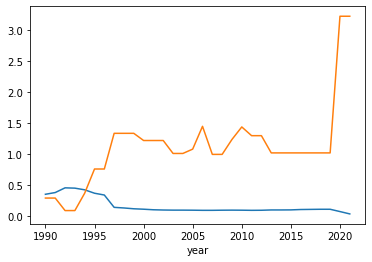

Russia


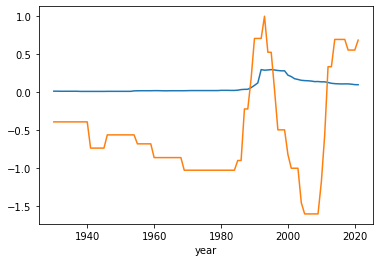

Tunisia


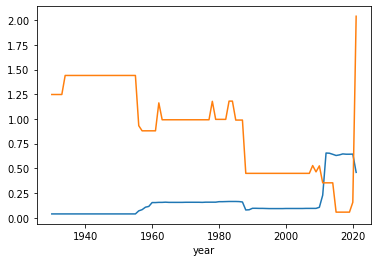

United States of America


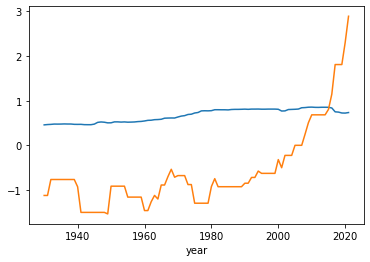

Ukraine


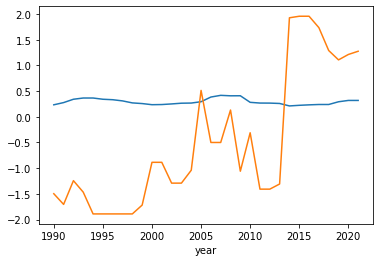

Brazil


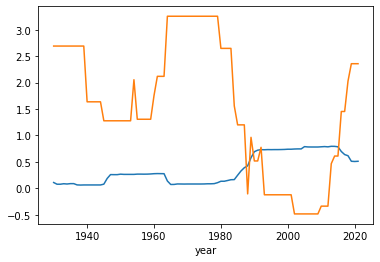

China


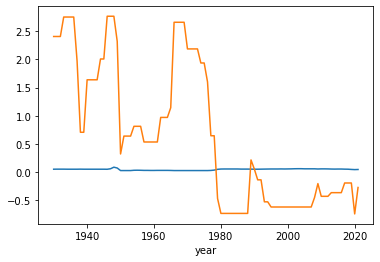

Turkey


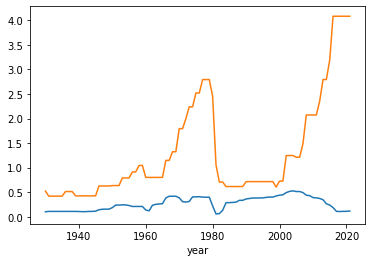

India


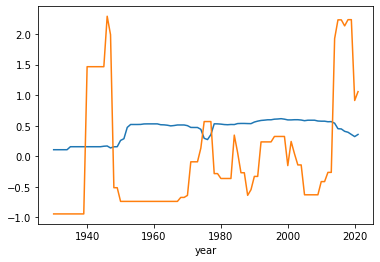

Germany


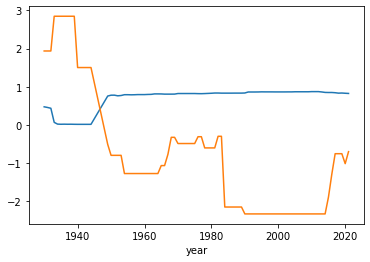

Austria


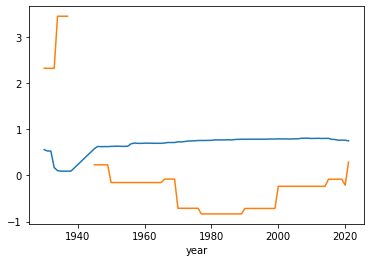

Australia


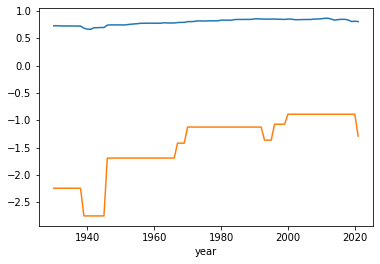

Hungary


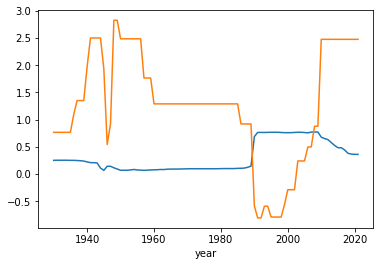

Poland


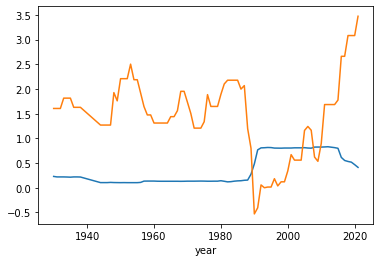

Afghanistan


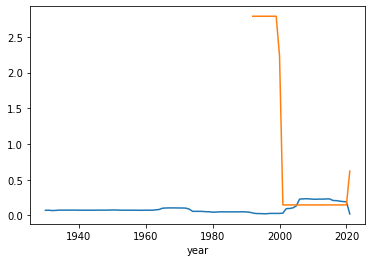

In [8]:
import matplotlib.pyplot as plt

for c in prime_coutries:
    print(c)
    core_data[(core_data.country_name == c) & (core_data.year > 1929)].set_index('year').v2x_libdem.plot()
    core_data[(core_data.country_name == c) & (core_data.year > 1929)].set_index('year').v2cacamps.plot()
    plt.show()

Belarus


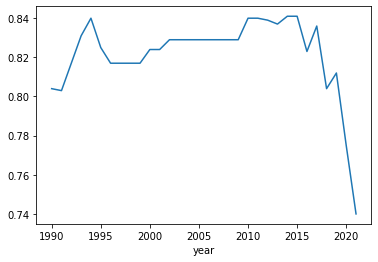

Russia


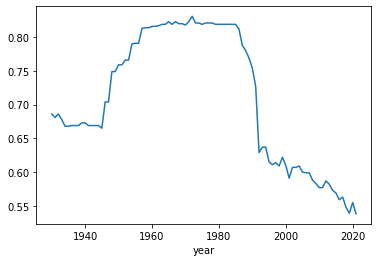

Tunisia


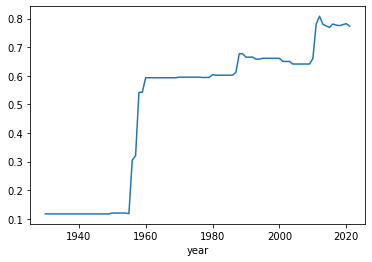

United States of America


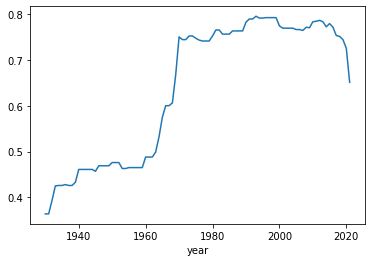

Ukraine


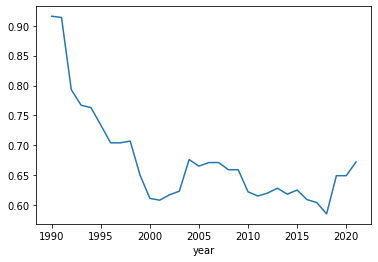

Brazil


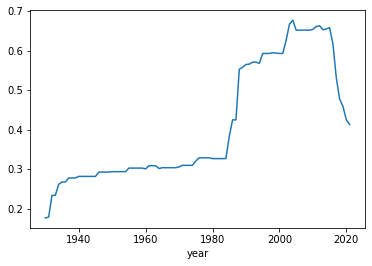

China


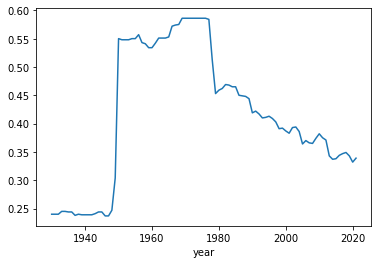

Turkey


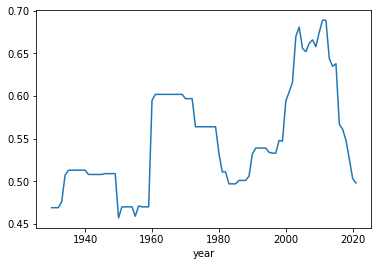

India


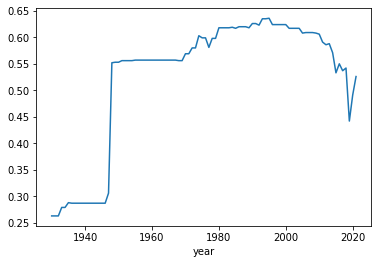

Germany


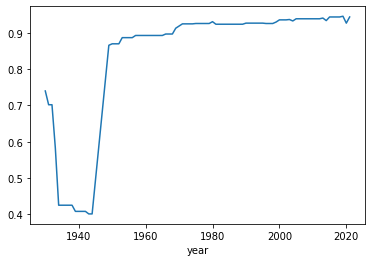

Austria


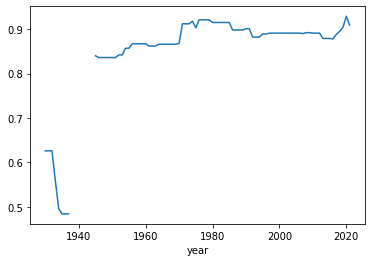

Australia


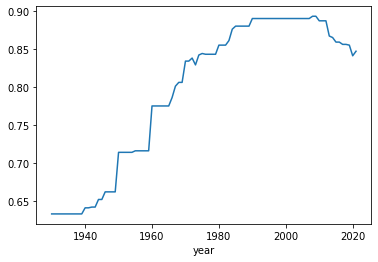

Hungary


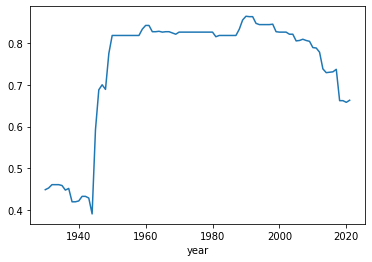

Poland


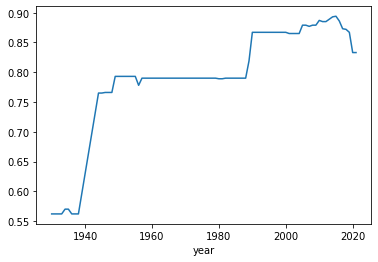

Afghanistan


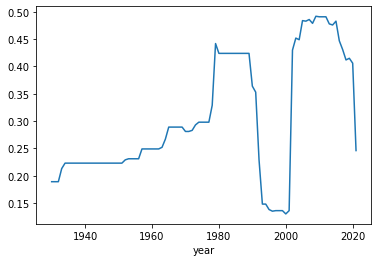

In [9]:

for c in prime_coutries:
    print(c)
    core_data[(core_data.country_name == c) & (core_data.year > 1929)].set_index('year').v2x_egal.plot()
    plt.show()

In [11]:
df[core_set].columns

Index(['country_name', 'country_text_id', 'country_id', 'year',
       'historical_date', 'project', 'historical', 'histname', 'codingstart',
       'codingend', 'v2x_polyarchy', 'v2x_libdem', 'v2x_partipdem',
       'v2x_delibdem', 'v2x_egaldem', 'v2x_liberal', 'v2x_partip',
       'v2xdl_delib', 'v2x_egal', 'v2cacamps'],
      dtype='object')

In [12]:
df_mean = df[core_set].groupby('year').mean()
df_mean

,country_id,project,historical,codingstart,codingend,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_liberal,v2x_partip,v2xdl_delib,v2x_egal,v2cacamps
year,,,,,,,,,,,,,,,
1789,152.742424,1.0,1.000000,1789.000000,1981.060606,0.054652,0.074703,0.036093,NaN,NaN,0.252520,0.103093,NaN,NaN,NaN
1790,152.742424,1.0,1.000000,1789.000000,1981.060606,0.054813,0.073692,0.035644,NaN,NaN,0.254020,0.103593,NaN,NaN,NaN
1791,152.742424,1.0,1.000000,1789.000000,1981.060606,0.054714,0.074650,0.035587,NaN,NaN,0.254020,0.103593,NaN,NaN,NaN
1792,152.742424,1.0,1.000000,1789.000000,1981.060606,0.054755,0.073600,0.035674,NaN,NaN,0.251320,0.103778,NaN,NaN,NaN
1793,152.742424,1.0,1.000000,1789.000000,1981.060606,0.053735,0.072225,0.034870,NaN,NaN,0.248180,0.101926,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,99.117318,0.0,0.396648,1874.139665,2021.000000,0.522229,0.406771,0.337056,0.405872,0.394603,0.614469,0.491872,0.624547,0.611520,0.038732
2018,99.117318,0.0,0.396648,1874.139665,2021.000000,0.521263,0.405598,0.337553,0.403330,0.392564,0.614855,0.494855,0.621547,0.609179,0.055709
2019,99.117318,0.0,0.396648,1874.139665,2021.000000,0.518944,0.404598,0.335201,0.401665,0.390827,0.616553,0.492475,0.622492,0.608151,0.103709


v2x_polyarchy


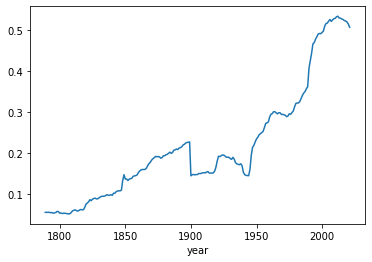

v2x_libdem


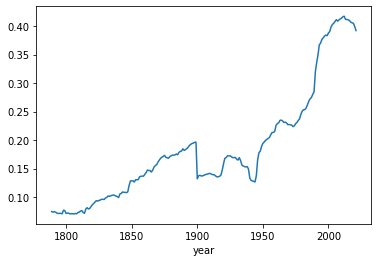

v2x_partipdem


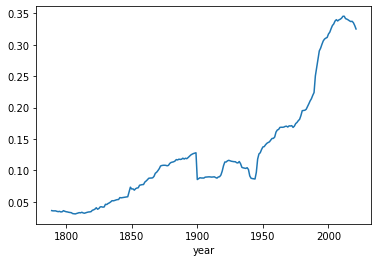

v2x_delibdem


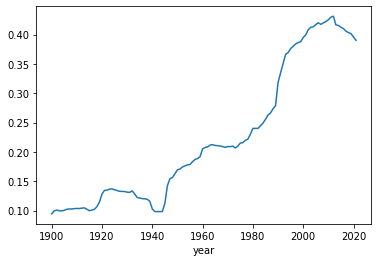

v2x_egaldem


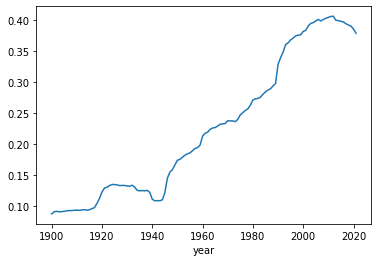

v2x_liberal


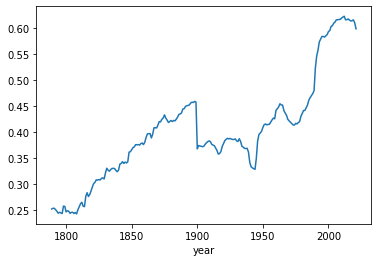

v2x_partip


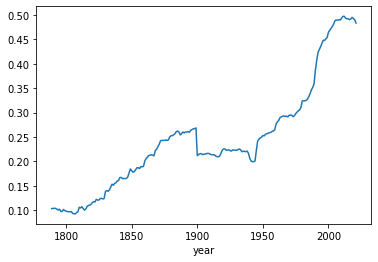

v2xdl_delib


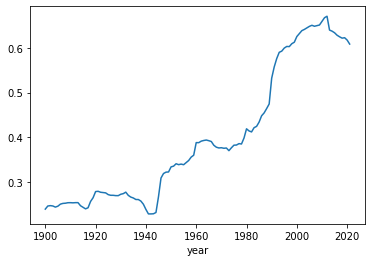

v2x_egal


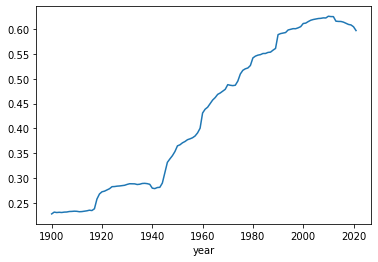

v2cacamps


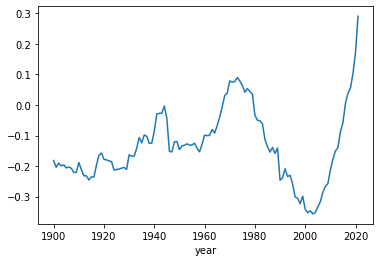

In [16]:
metrics = [
    'v2x_polyarchy', 'v2x_libdem', 'v2x_partipdem',
       'v2x_delibdem', 'v2x_egaldem', 'v2x_liberal', 'v2x_partip',
       'v2xdl_delib', 'v2x_egal', 'v2cacamps'
]
for m in metrics:
    print(m)
    df_mean[m].plot()
    plt.show()